## Skoltech
## Intro to data science, fall 2020
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification task and use classification performance metrics
- Get the taste of gradient boosting approach


# Submiting the answers

Google form to submit your answers: https://docs.google.com/forms/d/1zwUO1KZNDTZYuD12dyMO3CaErGHnZuHx1Mdbo-c11ME/

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then it must be provided with **3 decimals after the floating point**, e.g. 1.234

---

If your answer is a ``list of float or integer numbers or str``, then they should be reported in descending (alphabetical) order,  divided by a comma, e.g.:

10.453,9.112,5.001,5.000

---

The last part (Q5) do not have corresponding fields in the google form. It is **not optional** and it will be graded manually from your .ipynb file.

---

If you have any questions regarding this Home Assignment, ask them piazza topic: https://piazza.com/class/kespugtqfrn12g?cid=29

#### Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### Dataset
For the task we'll use kickstarter dataset. Kickstarter is the crowdfounding platform, where people can announce their project with financial goals and other can support the projects by paying the money ("pledging"). The goal will be to predict if the project will be successfull, i.e. would it achieve the funding goal. Let's take a brief look to the dataset.

In [2]:
df = pd.read_csv('ks-projects-201801.csv')
df.set_index("ID", inplace=True)

In [3]:
df.sample(5)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
591482354,Free Cisco CCNA Video Training,Webseries,Film & Video,USD,2013-05-02,2500.0,2013-04-02 22:09:34,11547.99,successful,366,US,11547.99,11547.99,2500.00
1542696291,Microprocessor Driven TFT Universal Automotive...,Gadgets,Technology,AUD,2015-08-15,5000.0,2015-07-16 01:26:53,100.00,failed,1,AU,74.27,73.33,3666.50
146472135,AcedIT - STUDENT LIFE SORTED,Apps,Technology,GBP,2014-11-03,36000.0,2014-10-04 18:26:17,32.00,failed,3,GB,51.62,50.62,56950.31
698666401,"Captain's Press, Making The Burgh Sexy!",Photography,Photography,USD,2010-07-30,2000.0,2010-06-15 07:35:08,0.00,failed,0,US,0.00,0.00,2000.00
558758883,Dream Song ~ PC & Mac game. A quest for real t...,Video Games,Games,GBP,2014-03-31,69000.0,2014-03-01 17:26:05,3052.00,failed,74,GB,5091.55,5057.75,114346.32


In [4]:
df.shape

(378661, 14)

In [5]:
df.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

# Section 1. Dataset acquaintance

-----

### Q1.1

#### How many NaN values are there in the dataset?

In [6]:
print('Q1.1', df.isna().sum().values.sum())

Q1.1 3801


Let us simplify the task a little bit: we are aiming to predict either project fails or not.
Thus 'success' projects will be encoded as 1, with state ['failed', 'canceled'] as 0 and we remove the rows with any other state.

### Q1.2 
#### How many '1' values are in resulting dataset (in state column)?

In [7]:
state_success = ['successful']
state_failed = ['failed', 'canceled']

In [8]:
cond1 = df.state == state_success[0]
cond2 = df.state == state_failed[0]
cond3 =  df.state == state_failed[1]
cond = cond1 | cond2 | cond3

In [9]:
df['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [10]:
# mask suitable rows
df.where(cond, inplace=True)
# drop nan rows
df.dropna(axis=0, how='all', inplace=True)

In [11]:
df

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0.0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15.0,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3.0,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1.0,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14.0,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1.0,US,25.0,25.0,50000.00
999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5.0,US,155.0,155.0,1500.00
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1.0,US,20.0,20.0,15000.00


In [12]:
maping= {'successful': 1, 
            'failed' : 0, 
         'canceled' : 0}
df['state'] = df.state.map(maping)

In [13]:
print('Q1.2', df.state.value_counts().values[1])

Q1.2 133956


----

### Q1.3
#### Whats is a name of a project with highest average pay check? Use column usd_pledged_real to judge.

In [14]:
print('Q1.3', df[df.usd_pledged_real == df.usd_pledged_real.max()]['name'].values[0])

Q1.3 Pebble Time - Awesome Smartwatch, No Compromises


-----

-----

### Q1.4
#### What is the most successful main category (in terms of success percentage)?

In [15]:
print('Q1.4', (df.groupby('main_category')['state'].sum()/df.groupby('main_category')['state'].count()).sort_values().index[-1])

Q1.4 Dance


-----

-----

### Q1.5
#### Define the category with highest goal per project. How many projects belong to it?  (note: we use category here, not main_category)

In [16]:
(df.groupby(['category'])['goal'].sum()/df.groupby(['category'])['goal'].count()).sort_values().index[-1]

'Movie Theaters'

In [17]:
print('Q1.5',df[df['category']=='Movie Theaters']['name'].nunique())

Q1.5 227


-----

### Q1.6
#### What is the category with biggest total pledge? Use 'usd_pledged_real' to judge.

In [18]:
print('Q1.6', df[df.usd_pledged_real == df.usd_pledged_real.max()]['category'].values[0])

Q1.6 Product Design


In [19]:
df

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0.0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15.0,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3.0,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1.0,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14.0,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,0,1.0,US,25.0,25.0,50000.00
999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,0,5.0,US,155.0,155.0,1500.00
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,0,1.0,US,20.0,20.0,15000.00


------

------

As one can notice, there are both numerical and object-type data in our dataframe. 

We suggest you to split them to perform EDA separately. 

### Q1.7
#### Split columns to 'numeric' (by data type) and object-type. How many 'object-type' features are there?

In [20]:
print('Q1.7', df.dtypes.value_counts()[0])

Q1.7 7


In [22]:
object_columns  = list(df.select_dtypes(include = 'object').columns)
numerical_columns = list(df.select_dtypes(include = 'number').columns)
object_columns, numerical_columns

(['name',
  'category',
  'main_category',
  'currency',
  'deadline',
  'launched',
  'country'],
 ['goal',
  'pledged',
  'state',
  'backers',
  'usd pledged',
  'usd_pledged_real',
  'usd_goal_real'])

### Q1.8
#### Let's do a bit of feature engineering. Let's create column 'pledge2goal' which define as ratio of usd_pledged_real to goal. How many outliers are there?
#### (We use a simple rule: an object is an outlier if it does not belong to [q25 - 1.5iqr, q75 + 1.5 iqr] interval, where qxx -- xx quantile, and iqr is inter-quantile range.)

In [23]:
df['pledge2goal'] = df['usd_pledged_real'] / df['goal'] 

In [24]:
def outliers(data):
    iqr = np.quantile(data, .75) - np.quantile(data, .25)
    boundary = [np.quantile(data, .25)-1.5*iqr, np.quantile(data, .75)+1.5*iqr]
    return boundary


boundary = outliers(df['pledge2goal'])

cond1 = df['pledge2goal'] < boundary[0]
cond2 = df['pledge2goal'] > boundary[1]

print('Q1.8', df[cond1 | cond2]['pledge2goal'].count())


Q1.8 18416


In [25]:
# remove outliers from dataset
outliers_idx = list(df[cond1 | cond2]['pledge2goal'].index)
df.drop(outliers_idx, inplace=True)
df.dropna(inplace=True)

### Q1.9
#### Visualize the feature for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the ratio matters.
- B. Distributions have almost no intersection, the bigger ratio, the bigger success.
- C. Distributions have almost no intersection, the less ratio, the less success.
- D. Distributions have almost no intersection, the less ratio, the bigger success.

Q1.9 D


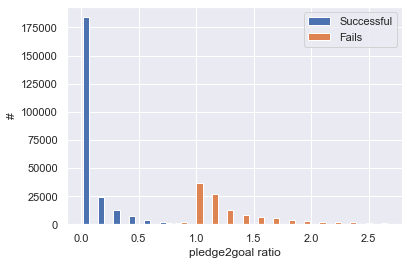

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline



n , x, _ = plt.hist([df.pledge2goal[df.state==0], df.pledge2goal[df.state==1]], bins = 20, label = ['Successful', 'Fails'])
plt.legend()
plt.ylabel('#')
plt.xlabel('pledge2goal ratio');
print('Q1.9', 'D')

-----

-----

### Q1.10
#### Continue with plot from Q1.9. Where are the peaks located? We expect two numbers here as the answer

In [27]:
print('Q1.10', 0, 1)

Q1.10 0 1


-----

-----

### Q1.11
#### Compute Pearson correlation coefficiton between the pledge2real and target variable. (Round up to second digit after point)

In [28]:
from scipy import stats
print('Q1.11', np.round(stats.pearsonr(df['pledge2goal'].values, df['state'].values)[0], 2))

Q1.11 0.9


----

-----

### Q1.12
#### Visualize dependancy of numerical data with success. What can you say about it?

In [29]:
import seaborn as sns

In [33]:
numerical_columns.append('pledge2goal')


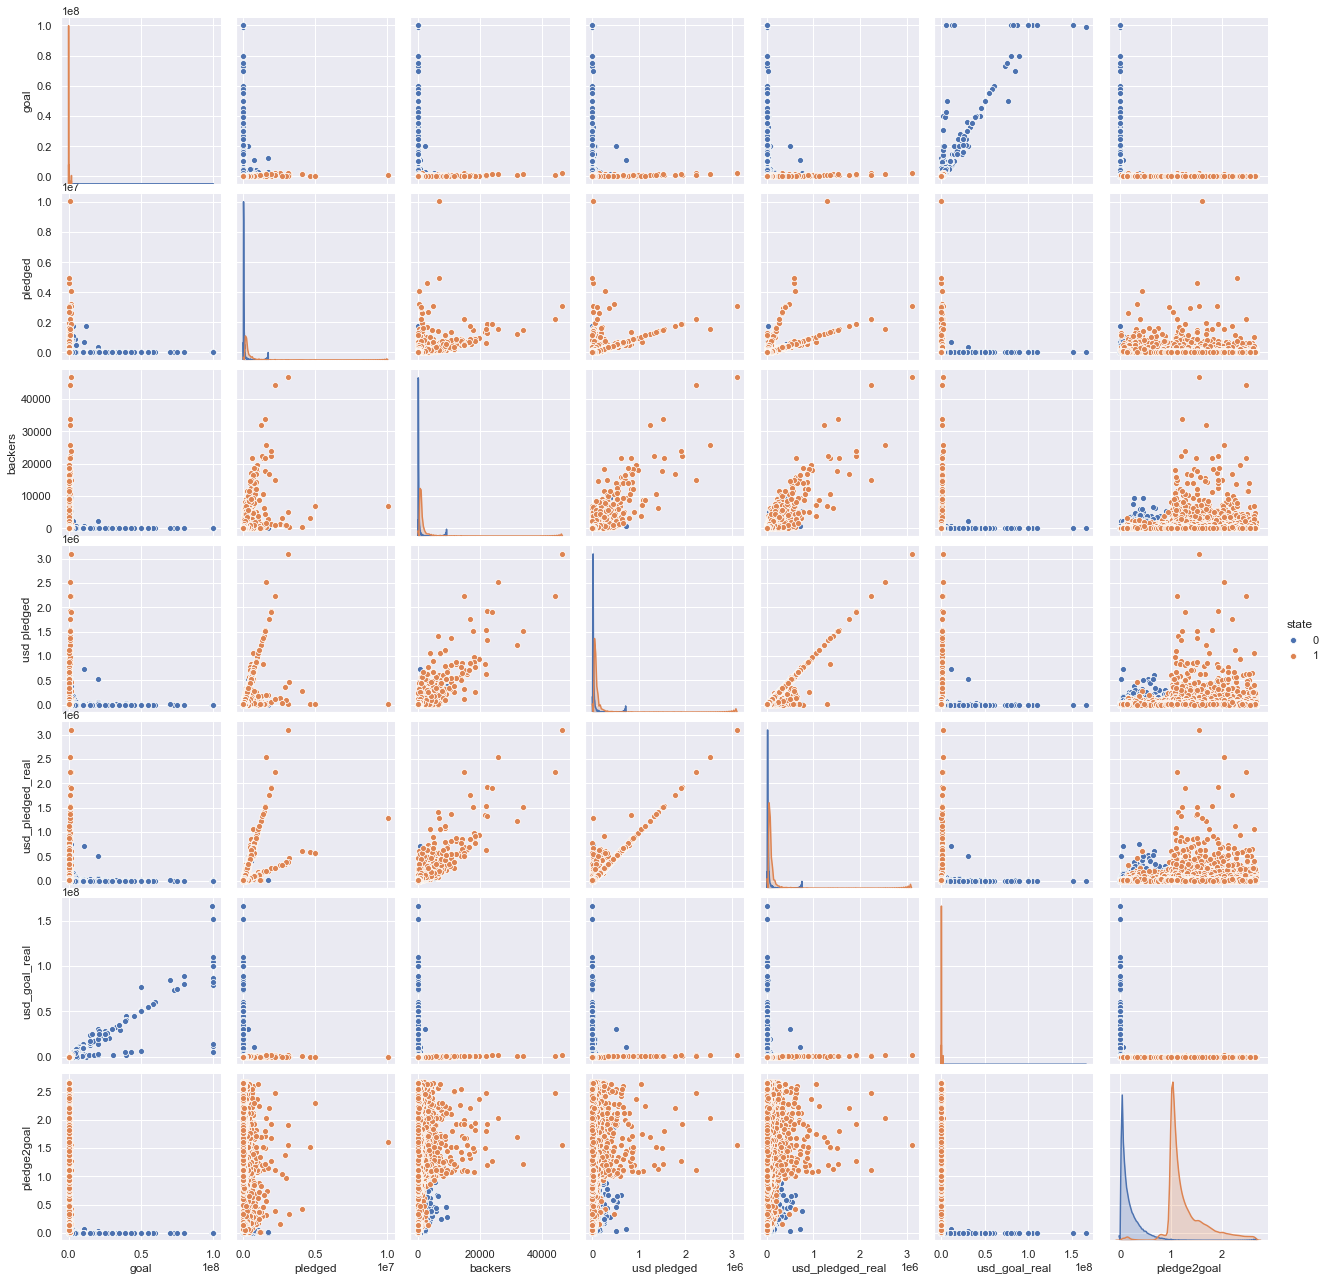

In [34]:
sns.pairplot(df[numerical_columns], hue = 'state')
# todo

Distribution intersects for different features

# Feature generation
Lets' generate some more feature that could be useful

### Q2.1 Create a year column that would hold the year. How many launched projects were in year 2012?

In [35]:
from datetime import datetime
from tqdm import tqdm
launch_year = []
launch_month = []
launch_day = []
for i in tqdm(range(df.shape[0])):
    d1 = datetime.strptime(df['launched'].iloc[i], "%Y-%m-%d %H:%M:%S")
    launch_month.append(d1.month)
    launch_day.append(d1.day)
    launch_year.append(d1.year)
df['launch_year'] = launch_year
# for boosting model new feature
df['launch_month'] = launch_month
df['launch_day'] = launch_day
print('Q2.1',df[df['launch_year']==2012].shape[0])

100%|███████████████████████████████████████████████████████████████████████| 351804/351804 [00:13<00:00, 25929.45it/s]


Q2.1 39737


### Q2.2 Make a column 'duration_days' with number of full days from launch to deadline.
What is median value for this column?

In [36]:
from datetime import datetime
from tqdm import tqdm
duration_days = []
for i in tqdm(range(df.shape[0])):
    d1 = datetime.strptime(df['launched'].iloc[i], "%Y-%m-%d %H:%M:%S")
    d2 = datetime.strptime(df['deadline'].iloc[i], "%Y-%m-%d")
    duration_days.append((d2-d1).days)

100%|███████████████████████████████████████████████████████████████████████| 351804/351804 [00:21<00:00, 16734.09it/s]


In [37]:
df['duration_days'] = duration_days

In [38]:
print('Q2.2', df['duration_days'].median())

Q2.2 29.0


### Q2.3 Delete mistaken value from column 'country'. What is the value?

In [39]:
df['country'].value_counts()

US    276056
GB     30315
CA     13953
AU      7368
DE      3821
NL      2688
FR      2687
IT      2647
ES      2065
SE      1710
MX      1630
NZ      1367
DK      1080
IE       765
CH       695
NO       694
BE       572
AT       559
HK       556
SG       487
LU        58
JP        31
Name: country, dtype: int64

In [40]:
print('Q2.3', 'seems like mistaken value is N,0"')

Q2.3 seems like mistaken value is N,0"


In [41]:
df['country'].replace(to_replace='N,0"', value=np.nan, inplace=True)
# drop nan rows
df.dropna(axis=0, how='any', inplace=True)


In [42]:
df

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pledge2goal,launch_year,launch_month,launch_day,duration_days
ID,,,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0.0,GB,0.0,0.0,1533.95,0.000000,2015,8,11,58
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15.0,US,100.0,2421.0,30000.00,0.080700,2017,9,2,59
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3.0,US,220.0,220.0,45000.00,0.004889,2013,1,12,44
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1.0,US,1.0,1.0,5000.00,0.000200,2012,3,17,29
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14.0,US,1283.0,1283.0,19500.00,0.065795,2015,7,4,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,0,1.0,US,25.0,25.0,50000.00,0.000500,2014,9,17,29
999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,0,5.0,US,155.0,155.0,1500.00,0.103333,2011,6,22,26
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,0,1.0,US,20.0,20.0,15000.00,0.001333,2010,7,1,45


### Q2.4 Make column 'region' out of column country (america, europe, asia, oceania(including australiza/nz))
Where is the region with the worst conversion rate (percentage of successful projects)

In [43]:
import pycountry 
import pycountry_convert as pc

country_codes = list(df['country'].value_counts().index)
continent_name = [pc.country_alpha2_to_continent_code(code) for code in country_codes]


In [44]:
continent = {'NA' : 'america', 
             'EU' : 'europe',
             'OC' : 'oceania',
             'AS' : 'asia'}

In [45]:
df['country'] = df.country.apply(lambda x: pc.country_alpha2_to_continent_code(x))

In [46]:
df['country'] = df.country.map(continent)

In [47]:
continent_popularity = {
    'america' : df.country.value_counts()['america']/df.shape[0],
    'asia' : df.country.value_counts()['asia']/df.shape[0],
    'oceania' : df.country.value_counts()['oceania']/df.shape[0],
    'europe':df.country.value_counts()['europe']/df.shape[0]
}

# for boosting model new feature
df['region'] = df['country']
df['country_popularity'] = df['region'].map(continent_popularity)

In [48]:
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,...,usd pledged,usd_pledged_real,usd_goal_real,pledge2goal,launch_year,launch_month,launch_day,duration_days,region,country_popularity
ID,,,,,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0.0,...,0.0,0.0,1533.95,0.000000,2015,8,11,58,europe,0.143137
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15.0,...,100.0,2421.0,30000.00,0.080700,2017,9,2,59,america,0.828981
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3.0,...,220.0,220.0,45000.00,0.004889,2013,1,12,44,america,0.828981
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1.0,...,1.0,1.0,5000.00,0.000200,2012,3,17,29,america,0.828981
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14.0,...,1283.0,1283.0,19500.00,0.065795,2015,7,4,55,america,0.828981


In [49]:
countries = list(continent.values())
success_rate =[df[df.country==i].state.value_counts()[1]/df[df.country==i].state.value_counts().sum() for i in countries]
success_dict = dict(zip( success_rate, countries))
print(success_dict)
best_rate = sorted(success_dict, reverse=True)[-1]
print('Q2.4',success_dict[best_rate])

{0.3421113088441532: 'america', 0.26537056160139805: 'europe', 0.2393817973669147: 'oceania', 0.33426443202979517: 'asia'}
Q2.4 oceania


### Q2.5 For each main_category leave only the three most popular category and replace other with "other"
What is the most frequent subcategory for design?

In [50]:
categories =list(df.main_category.value_counts().index)
print(categories)

['Film & Video', 'Music', 'Publishing', 'Games', 'Technology', 'Art', 'Design', 'Food', 'Fashion', 'Theater', 'Photography', 'Comics', 'Crafts', 'Journalism', 'Dance']


In [51]:
map_categories = dict()
for i in categories:
    most_popular_category = list(df[df.main_category==i]['category'].value_counts().index)
    changed_categories = most_popular_category[:3]+['other']*(len(most_popular_category)-3)
    map_categories.update(dict(zip(most_popular_category, changed_categories)))

In [52]:
df.category = df.category.map(map_categories)

In [53]:
print('Q2.5', df[df.main_category=='Design']['category'].value_counts().index[0])

Q2.5 Product Design


### Q2.6 create the columns "name_length" with length of the name.
What is the biggets length?

In [54]:
name_length = [len(str(df['name'].iloc[i])) for i in range(df.shape[0])]

In [55]:
maxlen = np.argmax(name_length)
print('Q2.6', np.max(name_length))

Q2.6 96


In [56]:
df['name_length'] = name_length

# Preprocessing

### Q3.1 Drop the leaking columns
Based on what we have already seen, can you assume what features are leakeges? What is the columns? Drop them


In [57]:
drop_columns = ['pledged','usd pledged','usd_pledged_real','pledge2goal','backers']
df.drop(drop_columns, axis=1, inplace=True)

In [58]:
df.head(2)

,name,category,main_category,currency,deadline,goal,launched,state,country,usd_goal_real,launch_year,launch_month,launch_day,duration_days,region,country_popularity,name_length
ID,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,other,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0,europe,1533.95,2015,8,11,58,europe,0.143137,31
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,other,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,0,america,30000.00,2017,9,2,59,america,0.828981,45


### Q3.2 Deal with the categorical features.
Lets drop some more columns for now (name, deadline, launched, country, usd_goal_real). Note: you can re-use these columns in the Q5 section. 
Preprocess the rest of categorical columns. How many columns do you have now?

In [59]:
drop_columns = ['country', 'usd_goal_real', 'name', 'deadline', 'launched']

drop_columns_for_boosting = ['country_popularity', 'launch_month', 'launch_day']

df.drop(drop_columns, axis=1, inplace=True)
# boosting data frame
boosting_df = df.copy()
df.drop(drop_columns_for_boosting, axis=1, inplace=True)

In [60]:
categorical_columns = ['currency', 'category', 'main_category', 'region' ]
df = pd.get_dummies(df, columns = categorical_columns)

In [61]:
print('Q3.2', df.shape[1])

Q3.2 83


### Q3.3 Split the dataset
Separate the target column (state) without stratification and with random state 42 and test size 0.2. How many of successful projects in train set?

In [62]:
from sklearn.model_selection import train_test_split
y_train, y_test = train_test_split(df['state'], test_size=0.2, random_state=42)

In [63]:
print('Q3.3', y_train.value_counts()[1])

Q3.3 92488


### Q3.4 Scale the numeric columns with standard scaler
What is max number in goal field after scaling?

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
df.drop('state', inplace=True, axis=1)

In [66]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [67]:
df

,goal,launch_year,duration_days,name_length,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,...,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater,region_america,region_asia,region_europe,region_oceania
ID,,,,,,,,,,,,,,,,,,,,,
1000002330,1000.0,2015,58,31,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1000003930,30000.0,2017,59,45,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1000004038,45000.0,2013,44,14,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1000007540,5000.0,2012,29,49,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1000011046,19500.0,2015,55,58,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,50000.0,2014,29,49,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
999977640,1500.0,2011,26,9,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
999986353,15000.0,2010,45,71,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [68]:
numeric_columns = ['goal', 'name_length', 'launch_year' , 'duration_days']

In [69]:
sc = StandardScaler()

In [70]:
X_train.loc[:, numeric_columns] = sc.fit_transform(X_train[numeric_columns])
X_test.loc[:, numeric_columns] = sc.transform(X_test[numeric_columns])

D:\conda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
D:\conda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [71]:
print('Q3.4', np.round(X_train.goal.max(), 3), np.round(X_test.goal.max(), 3))

Q3.4 81.812 81.812


# Feature selection

### Q4.1 Estimate feature importance by Anova
What is the two most important features by anova with f classifier?

In [72]:
y_train, y_test = y_train.values, y_test.values

In [73]:
from sklearn.feature_selection import SelectKBest, f_classif
fs = SelectKBest(score_func=f_classif, k=2)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [74]:
cols = fs.get_support(indices=True)
print('Q4.1', list(X_train.columns[cols]))

Q4.1 ['main_category_Music', 'main_category_Technology']


------

------

## Build a model with logistic regression

Use l2 penalty and search for optimal C in np.logspace(-2, 4, 7).

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=7)
clf = LogisticRegression(max_iter=1000)
params_regr = {'C':  np.logspace(-2, 4, 7)}
regr = GridSearchCV(clf, params_regr, cv=cv)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

### Q4.2 What is an optimal C for l2 regularization?

In [76]:
print('Q4.2', regr.best_params_['C'])

Q4.2 1000.0


### Q4.3 What is the accuracy for this params?

In [78]:
from sklearn.metrics import accuracy_score
y_pred = regr.best_estimator_.predict(X_test)
print('Q4.3', np.round(accuracy_score(y_test,y_pred), 3))

Q4.3 0.701


### Q4.4 What is the two most important features by logistic regression estimation?

In [79]:
clf = LogisticRegression(max_iter=1000, C=regr.best_params_['C'])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
np.round(accuracy_score(y_pred, y_test),3)

0.701

In [80]:
dict_with_coef = dict(zip(list(np.abs(clf.coef_[0])), list(X_train.columns)))
top2 = sorted(dict_with_coef, reverse=True)[:2]

In [81]:
print('Q4.4', dict_with_coef[top2[0]], dict_with_coef[top2[1]])

Q4.4 goal currency_JPY


### Q4.5 Build roc curve and calculate roc-auc score. What is the roc-auc score?

Q4.5 0.712


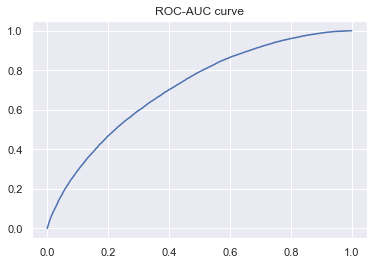

In [82]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = clf.predict_proba(X_test)[:,1]

print('Q4.5', np.round(roc_auc_score(y_test, y_pred_prob), 3))
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.title("ROC-AUC curve")
plt.show()


------

------

## Build a random forest model
Use random state 42, maximum depth from 2 to 15, and number of estimators in `[10, 20, 50, 100, 200]`

### Q4.6 What is an optimal depth and number of trees?

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
cv = KFold(n_splits=3)
rf_grid = {'max_depth': [2,10,15],
              'n_estimators':[10, 20, 50, 100, 200]}

rf_search = GridSearchCV(rf, rf_grid, cv=cv)

rf_search.fit(X_train, y_train)
y_pred = rf_search.predict(X_test)

In [88]:
best_rf = RandomForestClassifier(random_state=42, max_depth = rf_search.best_params_['max_depth'], n_estimators = rf_search.best_params_['n_estimators'])
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

### Q4.7 What is the accuracy for this params?

In [89]:
print('Q4.7', np.round(accuracy_score(y_pred, y_test), 3))

Q4.7 0.7


### Q4.8 Build precision-recall curve. What is the precision for recall 0.5?

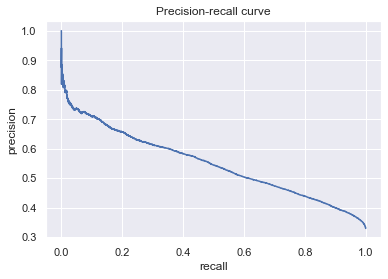

In [90]:
from sklearn.metrics import precision_recall_curve
y_pred_prob = best_rf.predict_proba(X_test)[:,1]
precisions, recalls, _ = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recalls, precisions)
plt.ylabel("precision")
plt.xlabel("recall")
plt.title("Precision-recall curve")
plt.show()

In [91]:
print('less than 0.5', np.where(recalls<0.5))

print('more than 0.5', np.where(recalls>0.5))

print(precisions[11288], precisions[11287])
print('Q4.8', np.round(precisions[11288], 3))

less than 0.5 (array([39414, 39415, 39416, ..., 55970, 55971, 55972], dtype=int64),)
more than 0.5 (array([    0,     1,     2, ..., 39411, 39412, 39413], dtype=int64),)
0.3787394914464258 0.3787502157776627
Q4.8 0.379


### Q4.9 What is the two most important features by random forest?

In [92]:
weights_tree = dict(zip(X_train.columns.values, np.abs(best_rf.feature_importances_)))
print('Q4.9', sorted(weights_tree.items(), key=lambda x: x[1], reverse = True)[:2])

Q4.9 [('goal', 0.29232958653271784), ('duration_days', 0.12043415551919265)]


------

------

# Build the stronger model

### Q5.1 Generate two (or more) meaningfull features

In [101]:
# add features 'launch_month','launch_day'
# add features 'country_popularity'
new_features = boosting_df[['country_popularity', 'launch_month', 'launch_day']]

In [107]:
new_features

,country_popularity,launch_month,launch_day
ID,,,
1000002330,0.143137,8,11
1000003930,0.828981,9,2
1000004038,0.828981,1,12
1000007540,0.828981,3,17
1000011046,0.828981,7,4
...,...,...,...
999976400,0.828981,9,17
999977640,0.828981,6,22
999986353,0.828981,7,1


In [108]:
df

,goal,launch_year,duration_days,name_length,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,...,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater,region_america,region_asia,region_europe,region_oceania
ID,,,,,,,,,,,,,,,,,,,,,
1000002330,1000.0,2015,58,31,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1000003930,30000.0,2017,59,45,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1000004038,45000.0,2013,44,14,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1000007540,5000.0,2012,29,49,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1000011046,19500.0,2015,55,58,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,50000.0,2014,29,49,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
999977640,1500.0,2011,26,9,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
999986353,15000.0,2010,45,71,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [109]:
# concatenate with added earlier features
frames = [df, new_features]
gb = pd.concat(frames, axis=1)

In [110]:
gb

,goal,launch_year,duration_days,name_length,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,...,main_category_Publishing,main_category_Technology,main_category_Theater,region_america,region_asia,region_europe,region_oceania,country_popularity,launch_month,launch_day
ID,,,,,,,,,,,,,,,,,,,,,
1000002330,1000.0,2015,58,31,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0.143137,8,11
1000003930,30000.0,2017,59,45,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.828981,9,2
1000004038,45000.0,2013,44,14,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.828981,1,12
1000007540,5000.0,2012,29,49,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.828981,3,17
1000011046,19500.0,2015,55,58,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.828981,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,50000.0,2014,29,49,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.828981,9,17
999977640,1500.0,2011,26,9,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.828981,6,22
999986353,15000.0,2010,45,71,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.828981,7,1


In [111]:
X_train_gb, X_test_gb = train_test_split(gb, test_size=0.2, random_state=42)

In [115]:
numeric_columns = ['goal', 'name_length', 'launch_year', 'duration_days', 'launch_month', 'launch_day', 'country_popularity']

In [117]:
X_train_gb.loc[:, numeric_columns] = sc.fit_transform(X_train_gb[numeric_columns])
X_test_gb.loc[:, numeric_columns] = sc.transform(X_test_gb[numeric_columns])

D:\conda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
D:\conda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Q5.2 Train an xgboost, that's beat random forest

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier(n_estimators = 20, learning_rate = 0.8, max_depth = 5)

gbt.fit(X_train_gb, y_train)
y_pred = gbt.predict(X_test_gb)
accuracy_score(y_test, y_pred)

0.7158368982817186